In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Official deaths daily']]
data.columns = ['ds', 'y']

In [4]:
data['floor'] = 0
data['cap'] = 50

# Modeling

### Model creation

In [5]:
model_args = {
    'changepoint_prior_scale': 0.95,
    'growth': 'logistic',
    'weekly_seasonality': 20,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [6]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
future = model.make_future_dataframe(periods = 1)
future['floor'] = 0
future['cap'] = 50

forecast = model.predict(future)

In [8]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
67,2020-06-12,7.0,13.821527,5.960889,21.534377
68,2020-06-13,15.0,11.968401,4.160148,19.209690
69,2020-06-14,10.0,8.027305,0.351236,15.489767
70,2020-06-15,9.0,10.908120,3.383215,18.904108
71,2020-06-16,16.0,17.272304,9.323572,24.968072
72,2020-06-17,14.0,17.692428,9.922408,25.284474
73,2020-06-18,30.0,15.385343,7.816063,22.930129
74,2020-06-19,18.0,14.441899,7.044432,21.663487
75,2020-06-20,12.0,12.589358,4.521542,19.981398
76,2020-06-21,NaN,8.648830,0.672743,16.108015


### Model explanation

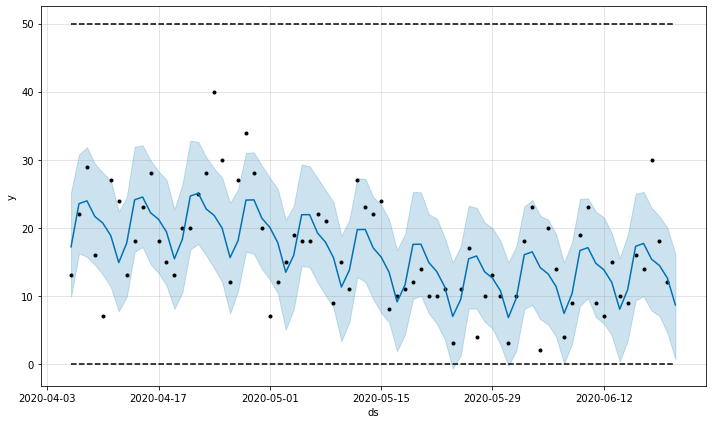

In [9]:
fig = model.plot(forecast)

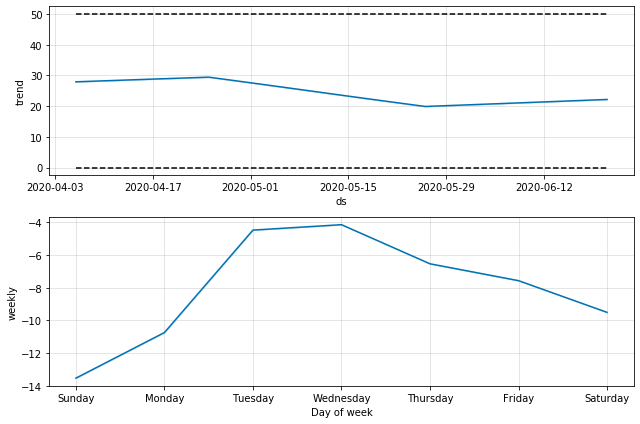

In [10]:
fig = model.plot_components(forecast)

### Model performance

In [11]:
results = cross_validation(model, initial = '65 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 10 forecasts with cutoffs between 2020-06-10 00:00:00 and 2020-06-19 00:00:00


In [12]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-11,10.195622,2.358159,18.014959,9.0,2020-06-10
1,2020-06-12,10.279220,2.812347,18.428489,7.0,2020-06-11
2,2020-06-13,7.395941,-0.350433,15.194945,15.0,2020-06-12
3,2020-06-14,3.673576,-3.555479,11.240090,10.0,2020-06-13
4,2020-06-15,8.774073,1.111094,16.634158,9.0,2020-06-14
5,2020-06-16,14.962769,7.590924,23.195204,16.0,2020-06-15
6,2020-06-17,15.651056,8.424350,23.069766,14.0,2020-06-16
7,2020-06-18,11.226542,3.968607,18.355431,30.0,2020-06-17
8,2020-06-19,13.639884,5.455437,21.419568,18.0,2020-06-18
9,2020-06-20,12.517993,4.362607,20.047753,12.0,2020-06-19


In [13]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,48.560266,6.96852,4.49711,0.285993,0.187538,0.9


### Tomorrow prediction

In [14]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

9